# Implementing Logistic Regression from scratch

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
from sklearn.metrics import mean_squared_error

## Importing Train and Test data

In [42]:
train=pd.read_csv('/home/atul/Downloads/train_lr.csv')
train=train.fillna(0)
train.head() 

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs,Id
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0,0
1,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0,3
2,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0,4
3,Don MacLean,62,10.9,6.6,2.5,5.8,43.5,0.0,0.1,50.0,...,81.1,0.5,1.4,2.0,0.6,0.2,0.1,0.7,1.0,6
4,Tracy Murray,48,10.3,5.7,2.3,5.4,41.5,0.4,1.5,30.0,...,87.5,0.8,0.9,1.7,0.2,0.2,0.1,0.7,1.0,7


Target Variable : TARGET_5Yrs

In [43]:
test=pd.read_csv('/home/atul/Downloads/test_lr.csv')

In [44]:
test.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Id
0,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,1
1,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,2
2,Tony Bennett,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,32.5,...,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,5
3,Duane Cooper,65,9.9,2.4,1.0,2.4,39.2,0.1,0.5,23.3,...,0.5,71.4,0.2,0.6,0.8,2.3,0.3,0.0,1.1,8
4,Lorenzo Williams,27,6.6,1.3,0.6,1.3,47.2,0.0,0.0,0.0,...,0.3,28.6,0.6,1.4,2.0,0.2,0.2,0.6,0.3,12


#### Converting to matrix form

In [45]:
trd=train.iloc[:,1:-1].T #train data

In [46]:
X=[]
col=trd.shape[0]-1
for i in range(col):
    X.append(trd.iloc[i].values)
X.append(np.ones(943))
X=np.array(X)

In [47]:
featurelen=trd.shape[0]
observationlen=trd.shape[1]
observationlen
featurelen

20

In [48]:
y=trd.iloc[-1].values
y=np.asmatrix(y)
y.shape

(1, 943)

In [49]:
X.shape

(20, 943)

In [50]:
X.shape

(20, 943)

### Training the model

In [51]:
def sigmoid(z):
    return 1 / (1 + np.exp(np.negative(z)))

In [52]:
theta=np.matrix([np.zeros(featurelen)])
theta

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]])

In [53]:
m=observationlen

In [54]:
Jval=[] #error Values
iterval=[]
def logisticRegression(error_thres,maxi,s):
    theta=np.matrix([np.zeros(featurelen)]) 
    for i in range(maxi):
        z=theta.dot(X)
        h=sigmoid(z)
        J=(-1/(m))*(np.sum(y.dot(np.log(h.T))+(1-y).dot(np.log(1-h.T))))
        Jval.append(J)
        i+=1
        iterval.append(i)
        if(J<error_thres and (len(Jval)>10 and np.mean(Jval[-10:])==Jval[-1])):
            break
        else:
            theta=gradientAscent(X,y,theta,s)
    return(theta)

In [55]:
def gradientAscent(X,y,theta,s):
        theta=theta+((s/m)*X.dot(y.T-sigmoid(theta.dot(X)).T)).T
        return(theta)

In [56]:
X.dot(y.T-sigmoid(theta.dot(X)).T).shape

(20, 1)

In [57]:
theta=logisticRegression(0.001,1000,0.00001)
theta #learnt Parameter Value

matrix([[ 1.50804839e-02,  5.90695340e-03,  3.76292680e-03,
          1.46545082e-03,  2.65427801e-03, -4.27491582e-04,
         -4.33515870e-05, -2.03751360e-04, -2.82942146e-03,
          8.64699884e-04,  1.14976172e-03, -5.32667400e-03,
          7.12691361e-04,  1.05841211e-03,  1.77506689e-03,
          6.57694832e-04,  2.24048868e-04,  2.88125316e-04,
          5.12150858e-04, -1.42726013e-04]])

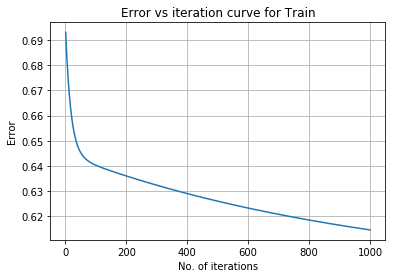

In [58]:
pt.plot(iterval,Jval) 
pt.title('Error vs iteration curve for Train')
pt.xlabel('No. of iterations')
pt.ylabel('Error')
pt.grid(True)

In [59]:
test=pd.read_csv('/home/atul/Downloads/test_lr.csv')
test.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Id
0,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,1
1,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,2
2,Tony Bennett,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,32.5,...,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,5
3,Duane Cooper,65,9.9,2.4,1.0,2.4,39.2,0.1,0.5,23.3,...,0.5,71.4,0.2,0.6,0.8,2.3,0.3,0.0,1.1,8
4,Lorenzo Williams,27,6.6,1.3,0.6,1.3,47.2,0.0,0.0,0.0,...,0.3,28.6,0.6,1.4,2.0,0.2,0.2,0.6,0.3,12


## Applying Test data on Learned Model

In [60]:
tsd=test.iloc[:,1:-1].T #test data
tsd.shape

(19, 397)

In [61]:
Xtest=[]
col=tsd.shape[0]
for i in range(col):
    Xtest.append(tsd.iloc[i].values)
Xtest.append(np.ones(397))
Xtest=np.array(Xtest)

In [62]:
Xtest.shape

(20, 397)

In [63]:
theta.T.shape

(20, 1)

In [64]:
out=sigmoid(Xtest.T@theta.T) #Probability Array
out.shape

(397, 1)

In [65]:
def predictY(x,theta):
    out=sigmoid(x.T@theta.T)
    yout=np.zeros(len(out))
    for i in range(len(out)):
        if(out[i]<=0.5):
            yout[i]=0
        else:
            yout[i]=1
    return(yout,out)

In [66]:
finalout, out =predictY(Xtest,theta)
finalout[:10] #final Predicted Class Array

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## Testing Classification Accuracy

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
from sklearn.metrics import classification_report

In [69]:
ya,yout=predictY(X,theta) #True Class Values 
ya.T.shape

(943,)

In [70]:
y.T.shape #predicted Class Values

(943, 1)

In [71]:
accuracy_score(ya,y.T)

0.6383881230116649

In [72]:
print(classification_report(ya,y.T))

              precision    recall  f1-score   support

         0.0       0.04      0.67      0.08        21
         1.0       0.99      0.64      0.78       922

   micro avg       0.64      0.64      0.64       943
   macro avg       0.51      0.65      0.43       943
weighted avg       0.97      0.64      0.76       943



Due to unbalanced Data, the metrics for class 0 are not that good

In [73]:
from sklearn.metrics import confusion_matrix
cnfmat=confusion_matrix(ya, y.T,labels=[0,1])
cnfmat

array([[ 14,   7],
       [334, 588]])

In [74]:
from sklearn.metrics import roc_curve

In [75]:
ya.shape,out.shape

((943,), (397, 1))

In [76]:
fpr, tpr, thresholds = roc_curve(ya,yout)

In [77]:
fpr,tpr

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.        , 0.0010846 , 0.01518438, 0.01735358, 0.03253796,
        0.03470716, 0.06073753, 0.06290672, 0.10845987, 0.11062907,
        0.21149675, 0.21366594, 0.30585683, 0.30802603, 0.3373102 ,
        0.33947939, 0.35466377, 0.35683297, 0.56724512, 0.57049892,
        0.65509761, 0.65726681, 0.87744035, 0.87960954, 0.92624729,
        0.92950108, 0.93058568, 0.93275488, 1.        , 1.        ]))

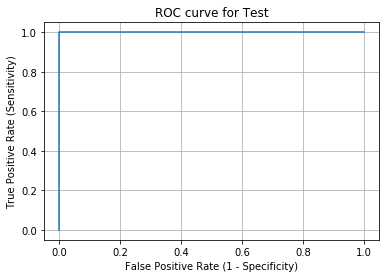

In [78]:
pt.plot(fpr,tpr) #ROC curve
pt.title('ROC curve for Test')
pt.xlabel('False Positive Rate (1 - Specificity)')
pt.ylabel('True Positive Rate (Sensitivity)')
pt.grid(True)